In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [4]:
data = pd.read_csv("/home/ivana/Desktop/IP-projekat/2023_Data_Mining_Smoking_Dataset/datasets/smoking.csv")
data.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental caries',
       'tartar', 'smoking'],
      dtype='object')

In [5]:
data.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [6]:
data.isna().any().any()

False

In [7]:
data.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

Zakljucujemo da u skupu nema nedostajucih vrednosti.

Podela na ulazne i ciljne atribute: (Informacije o tome da li je osoba pusac se nalaze u koloni smoking sto predstavlja ciljni atrinut. Ostali atributi se koriste za predikciju - ulazni atributi)


In [8]:
oral = data['oral'].unique()
gender = data['gender'].unique()
tartar = data['tartar'].unique()
gender, oral, tartar

(array(['F', 'M'], dtype=object),
 array(['Y'], dtype=object),
 array(['Y', 'N'], dtype=object))

In [9]:
data['oral'] = data['oral'].replace("Y", 1)
data['gender'] = data['gender'].replace("F", 1)
data['gender'] = data['gender'].replace("M", 1)
data['tartar'] = data['tartar'].replace("Y", 1)
data['tartar'] = data['tartar'].replace("N", 0)

In [10]:
Y = data['smoking']
X = data.drop('smoking', axis=1)
feature_names = X.columns
X.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0,1
1,1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0,1
2,2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,1,0,0
3,3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0,1
4,4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,1,0,0


In [11]:
Y.unique()

array([0, 1])

In [12]:
def IQR(data, feature_names):
    
    iqr = pd.DataFrame(0, index=feature_names, columns=['lower', 'min', 'num_lower', 'upper', 'max', 'num_upper', 'percantage'])
    for name in feature_names:

        (Q1, Q3) = X[name].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        upper = Q3 + (1.5 * IQR)
        lower = Q1 - (1.5 * IQR)
        
        iqr.loc[name, 'upper'] = upper
        iqr.loc[name, 'lower'] = lower

        num_of_out_lower = (X[name] < lower).sum()
        num_of_out_upper = (X[name] > upper).sum()

        percentage = round((num_of_out_lower + num_of_out_upper) / X.shape[0] * 100)

        iqr.loc[name, 'num_lower'], iqr.loc[name, 'num_upper'], iqr.loc[name, 'percantage']  = num_of_out_lower, num_of_out_upper, percentage
        iqr.loc[name, 'min'], iqr.loc[name, 'max'] = min(X[name]), max(X[name])    
    return iqr

Podela na test i trening skup:

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=41)

In [14]:
IQR(X_train, feature_names)

,lower,min,num_lower,upper,max,num_upper,percantage
ID,-27845.5,0.0,0,83536.5,55691.0,0,0
gender,1.0,1.0,0,1.0,1.0,0,0
age,17.5,20.0,0,77.5,85.0,295,1
height(cm),145.0,130.0,212,185.0,190.0,37,0
weight(kg),25.0,30.0,0,105.0,135.0,198,0
waist(cm),58.0,51.0,34,106.0,129.0,462,1
eyesight(left),0.2,0.1,818,1.8,9.9,496,2
eyesight(right),0.2,0.1,888,1.8,9.9,469,2
hearing(left),1.0,1.0,0,1.0,2.0,1425,3
hearing(right),1.0,1.0,0,1.0,2.0,1456,3


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from sklearn.metrics import classification_report
from termcolor import colored

def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Izvestaj o klasifikaciji za model{} nad {} podacima".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Matrica konfuzije za model {} nad {} podacima ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['1', '0'], index=['1', '0']))
    print("---------------------------------------------------------------------------------")
    


In [17]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()

In [18]:
knn.fit(X_train, Y_train) # treninranje modela

KNeighborsClassifier()

In [19]:
report(knn, X_train, Y_train)

Izvestaj o klasifikaciji za modelKNeighborsClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     26428
           1       0.75      0.71      0.73     15341

    accuracy                           0.81     41769
   macro avg       0.79      0.79      0.79     41769
weighted avg       0.80      0.81      0.81     41769

---------------------------------------------------------------------------------
Matrica konfuzije za model KNeighborsClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  22756   3672
0   4409  10932
---------------------------------------------------------------------------------


In [20]:
report(knn, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelKNeighborsClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      8809
           1       0.61      0.56      0.59      5114

    accuracy                           0.71     13923
   macro avg       0.68      0.68      0.68     13923
weighted avg       0.70      0.71      0.70     13923

---------------------------------------------------------------------------------
Matrica konfuzije za model KNeighborsClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  6947  1862
0  2226  2888
---------------------------------------------------------------------------------


In [21]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2,4,6, 8]
         }
params_grid = {'n_neighbors': range(10, 50, 5),
               'weights': ['uniform', 'distance'],
                'p': [1, 2]}

estimator = GridSearchCV(KNeighborsClassifier(), params_grid, cv=6, verbose=4)


In [22]:
estimator.fit(X_train, Y_train)

Fitting 6 folds for each of 32 candidates, totalling 192 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.713 total time=   1.4s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.713 total time=   1.4s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.715 total time=   1.5s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=0.706 total time=   1.3s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.718 total time=   1.4s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.714 total time=   1.4s
[CV 1/6] END n_neighbors=10, p=1, weights=distance;, score=0.737 total time=   1.3s
[CV 2/6] END n_neighbors=10, p=1, weights=distance;, score=0.738 total time=   1.3s
[CV 3/6] END n_neighbors=10, p=1, weights=distance;, score=0.747 total time=   1.3s
[CV 4/6] END n_neighbors=10, p=1, weights=distance;, score=0.735 total time=   1.3s
[CV 5/6] END n_neighbors=10, p=1, weights=distance;, score=0.745 total time=   1.3s
[CV 6/6] END n_neigh

[CV 3/6] END n_neighbors=30, p=1, weights=uniform;, score=0.734 total time=   1.5s
[CV 4/6] END n_neighbors=30, p=1, weights=uniform;, score=0.716 total time=   1.4s
[CV 5/6] END n_neighbors=30, p=1, weights=uniform;, score=0.728 total time=   1.4s
[CV 6/6] END n_neighbors=30, p=1, weights=uniform;, score=0.713 total time=   1.5s
[CV 1/6] END n_neighbors=30, p=1, weights=distance;, score=0.749 total time=   1.4s
[CV 2/6] END n_neighbors=30, p=1, weights=distance;, score=0.736 total time=   1.5s
[CV 3/6] END n_neighbors=30, p=1, weights=distance;, score=0.750 total time=   1.8s
[CV 4/6] END n_neighbors=30, p=1, weights=distance;, score=0.734 total time=   1.7s
[CV 5/6] END n_neighbors=30, p=1, weights=distance;, score=0.745 total time=   1.4s
[CV 6/6] END n_neighbors=30, p=1, weights=distance;, score=0.731 total time=   1.7s
[CV 1/6] END n_neighbors=30, p=2, weights=uniform;, score=0.723 total time=   0.5s
[CV 2/6] END n_neighbors=30, p=2, weights=uniform;, score=0.713 total time=   0.7

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 50, 5), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=4)

Najbolja kombinacija parametara:

In [21]:
estimator.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}

Najbolji score:

In [22]:
estimator.best_score_

0.7434697491006204

In [23]:
report(estimator.best_estimator_, X_train, Y_train)

Izvestaj o klasifikaciji za modelKNeighborsClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26428
           1       1.00      1.00      1.00     15341

    accuracy                           1.00     41769
   macro avg       1.00      1.00      1.00     41769
weighted avg       1.00      1.00      1.00     41769

---------------------------------------------------------------------------------
Matrica konfuzije za model KNeighborsClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  26428      0
0      0  15341
---------------------------------------------------------------------------------


In [24]:
report(estimator.best_estimator_, X_test, Y_test, "test")

Izvestaj o klasifikaciji za modelKNeighborsClassifier nad test podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.83      0.80      8809
           1       0.67      0.60      0.63      5114

    accuracy                           0.74     13923
   macro avg       0.73      0.71      0.72     13923
weighted avg       0.74      0.74      0.74     13923

---------------------------------------------------------------------------------
Matrica konfuzije za model KNeighborsClassifier nad test podacima 
---------------------------------------------------------------------------------
      1     0
1  7277  1532
0  2029  3085
---------------------------------------------------------------------------------


Rezultati cross-validacije:

In [25]:
estimator.cv_results_

{'mean_fit_time': array([0.00605671, 0.00530032, 0.00464551, 0.00469844, 0.00478415,
        0.00545343, 0.00474397, 0.00466084, 0.00484669, 0.00571779,
        0.00472558, 0.00468961, 0.00545498, 0.0048157 , 0.00469307,
        0.00465282, 0.00501569, 0.00640241, 0.00502233, 0.00608214,
        0.00542013, 0.00692479, 0.00493431, 0.00594326, 0.0052195 ,
        0.00720747, 0.00498521, 0.00605408, 0.00598391, 0.00687635,
        0.00552587, 0.00614138]),
 'std_fit_time': array([1.21089857e-03, 5.77465375e-04, 2.36017000e-05, 7.49571060e-05,
        1.61416270e-04, 3.64349425e-04, 2.14860325e-04, 4.58330393e-05,
        2.59418871e-04, 7.71597392e-04, 1.37770374e-04, 6.63301836e-05,
        9.70758484e-04, 1.72554928e-04, 1.17451537e-04, 8.24934792e-05,
        6.27354093e-04, 6.84156042e-04, 7.33221205e-04, 6.58924639e-04,
        5.63408858e-04, 4.48596762e-04, 5.85849983e-04, 6.37686097e-04,
        5.70321717e-04, 7.44268949e-04, 6.56069387e-04, 6.61290146e-04,
        1.01947350e-0

Pokusajmo sa Ansamblima. Ideja je da veći broj modela konstruistan na adekvatan način daje bolju preciznost od samo jednog modela.

In [23]:
from sklearn.ensemble import BaggingClassifier

baggingKnn = BaggingClassifier(estimator=KNeighborsClassifier(), n_estimators=20)
baggingKnn.fit(X_train, Y_train)

report(baggingKnn, X_train, Y_train)
report(baggingKnn, X_test, Y_test, "test")


Izvestaj o klasifikaciji za modelBaggingClassifier nad training podacima
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.87      0.86     26428
           1       0.77      0.72      0.74     15341

    accuracy                           0.82     41769
   macro avg       0.81      0.80      0.80     41769
weighted avg       0.82      0.82      0.82     41769

---------------------------------------------------------------------------------
Matrica konfuzije za model BaggingClassifier nad training podacima 
---------------------------------------------------------------------------------
       1      0
1  23059   3369
0   4241  11100
---------------------------------------------------------------------------------
Izvestaj o klasifikaciji za modelBaggingClassifier nad test podacima
---------------------------------------------------------------------------------
     

Hajde da uporedimo dobijene modele(koristimo rok krivu za proedjenje):

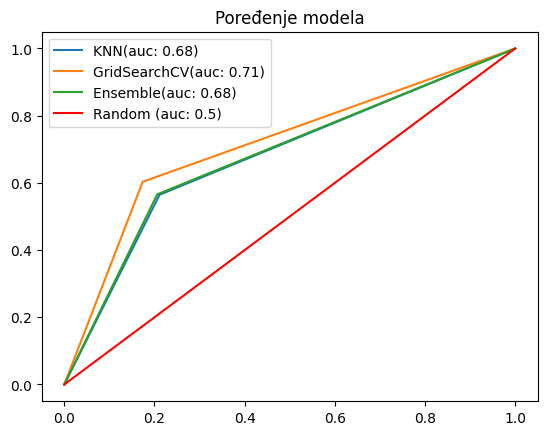

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_, baggingKnn]
model_names = ['KNN', 'GridSearchCV', 'Ensemble']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Mozemo zakljuciti da model za koji smo podesili parametre daje najbolji rezultat, a KNN i Ansambli daju veoma slican rezultat.